In [1]:
import cv2
import numpy as np
import sys
import glob
import math
import time
import os
from skimage import measure
from skimage.io import imread
from skimage.measure import regionprops
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

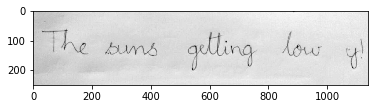

In [50]:
number_image = cv2.imread("trial.jpg",0)
plt.imshow(number_image, cmap="gray")

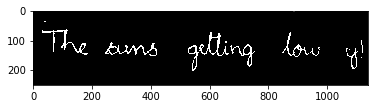

In [51]:
blur = cv2.GaussianBlur(number_image,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
th3 = cv2.bitwise_not(th3)
plt.imshow(th3,cmap="gray")


In [52]:
th4=th3[th3[:,]]
sum=np.sum(th3,axis=0)
sum=sum/255
print(sum)

[3. 2. 0. ... 0. 0. 0.]


In [53]:
l=len(sum)
a=[]
count=0
for i in range(0,len(sum)-1):
    if sum[i]==0 and sum[i+1]==0:
        count+=1
    else:
        if(count!=0):
            a.append(count)
        count=0
print(a)

[26, 56, 102, 5, 91, 83, 2]


In [54]:
mean=print(int(np.mean(a)))

52


In [63]:
stored=0
position=[]
found=0
count=0
appended=0
for i in range(0,len(sum)-1):
    if sum[i]==0 and sum[i+1]==0:
        if(stored==0):
            t=i
            stored=1
        count+=1
    if(count>35):
        if appended!=1:
            position.append(t)
            appended=1
    if sum[i]==0 and sum[i+1]>0:
        appended=0
        count=0
        stored=0
print(position)
print(position[-1])

[188, 423, 756, 980]
980


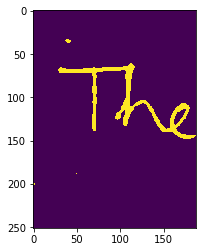

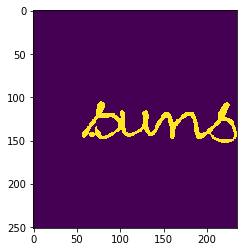

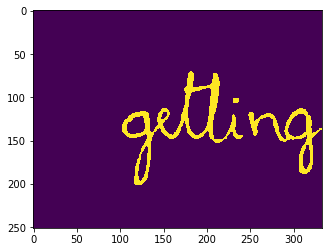

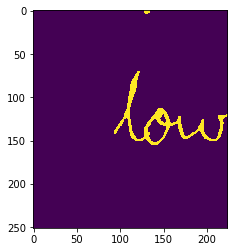

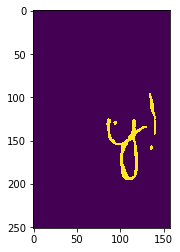

In [75]:
height = np.size(th3, 0)
width = np.size(th3, 1)
im=[]
i=0
okay=0
if position[0]!=0:
    im.append(th3[:,0:position[0]])
for j in range(0,len(position)-1):
    im.append(th3[:,position[j]:position[j+1]])
for i in range(position[-1],width-1):
    if sum[i]>0:
        okay=1
if okay==1:
    im.append(th3[:,position[-1]:width-1])
for i in range(0,len(im)):
    plt.imshow(im[i])
    plt.show()